In [183]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(database="piscineds",
                        user='mpellegr', password='mysecretpassword', 
                        host='localhost', port='5432'
)
cursor = conn.cursor()

In [184]:
cursor.execute("""WITH temp AS(
                    SELECT user_id,
                        COUNT(*) AS cnt
                    FROM customers
                    WHERE event_type='purchase'
                    GROUP BY user_id
                    )
                SELECT (cnt / 10) * 10 AS frequency_groups,
                    COUNT(*) AS user_count
                FROM temp
                GROUP BY frequency_groups
                ORDER BY frequency_groups
                """)
res = cursor.fetchall()
frequency = [frequency[0] for frequency in res]
n_of_customers = [customers[1] for customers in res]

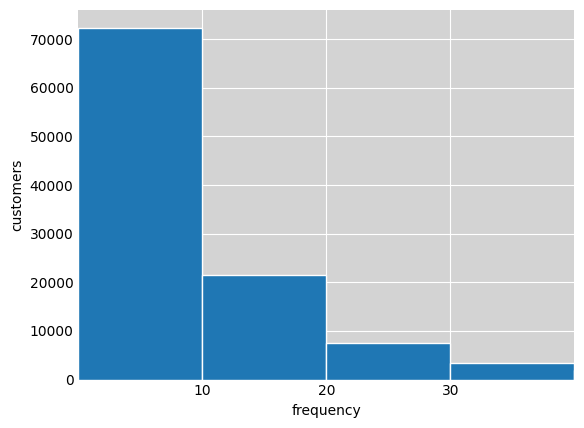

In [185]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
ax.bar(frequency, n_of_customers, width=10, edgecolor="white", align='edge')
ax.set_xticks([10, 20, 30])
ax.set_xlim(0, 40)
ax.set_ylabel('customers')
ax.set_xlabel('frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.grid(True, color='white')
plt.show()

In [198]:
cursor.execute("""WITH temp AS(
                    SELECT user_id,
                        SUM(price) AS tot_spent_each_user
                    FROM customers
                    WHERE event_type='purchase'
                    GROUP BY user_id
                    )
                SELECT ((tot_spent_each_user::int / 50) * 50)::int AS frequency_groups,
                    COUNT(*) AS user_count
                FROM temp
                GROUP BY frequency_groups
                ORDER BY frequency_groups
                """)
res = cursor.fetchall()
print(len(res))
value = [value[0] for value in res]
new_n_of_customers = [customers[1] for customers in res]

47


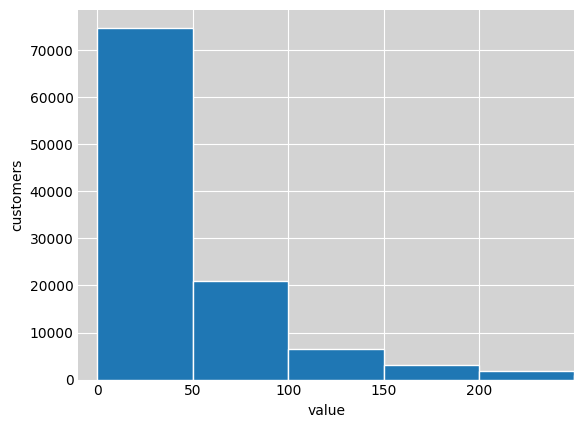

In [197]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
ax.bar(value, new_n_of_customers, width=50, edgecolor="white", align='edge')
ax.set_xticks([0, 50, 100, 150, 200])
ax.set_xlim(-10, 250)
ax.set_ylabel('customers')
ax.set_xlabel('value')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.grid(True, color='white')
plt.show()